In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Keras入門

ディープラーニングを実行するためのライブラリとしてKerasを紹介します。

公式のドキュメント
https://keras.io/ja/

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:100,:]
y = iris.target[:100]

## モデルを構築する

Sequenctialモデルに層を積み重ねていく。

Denseは単純にすべてのネットワークを結合するもの。

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(units=1, activation='sigmoid', input_dim=4))

Using TensorFlow backend.


`summary()`メソッドで、現在のモデルの様子を見ることができる。

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


## モデルのコンパイル
- 最適化アルゴリズムの指定
- 損失関数の指定
- 評価関数の指定

をすることで、どのように学習するかを指定することができる。

ここでは2クラス分類なので、`loss='binary_crossentropy'`を指定する。
最適化は確率的勾配法sgdを用い、評価は正解率accuracyを用いる。

他クラス分類なら`loss='categorical_crossentropy'`を、回帰なら`loss='mse'`を用いる

In [5]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 訓練と予測、モデルと重みの保存、読み込み

`model.fit()`で訓練、
`model.evaluate()`でモデルの評価、
`model.predict()`で予測ができる。

モデルや学習したパラメータを保存することができる。
また、保存してあるモデルやパラメータを読み込むことができる。

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
90/90 [==============================] - 0s - loss: 0.5815 - acc: 0.5000     
Epoch 2/20
90/90 [==============================] - 0s - loss: 0.4962 - acc: 0.5222     
Epoch 3/20
90/90 [==============================] - 0s - loss: 0.4409 - acc: 0.6667     
Epoch 4/20
90/90 [==============================] - 0s - loss: 0.4036 - acc: 0.8556     
Epoch 5/20
90/90 [==============================] - 0s - loss: 0.3817 - acc: 0.9778     
Epoch 6/20
90/90 [==============================] - 0s - loss: 0.3674 - acc: 0.9889     
Epoch 7/20
90/90 [==============================] - 0s - loss: 0.3583 - acc: 0.9889     
Epoch 8/20
90/90 [==============================] - 0s - loss: 0.3519 - acc: 0.9889     
Epoch 9/20
90/90 [==============================] - 0s - loss: 0.3447 - acc: 0.9889     
Epoch 10/20
90/90 [==============================] - 0s - loss: 0.3407 - acc: 1.0000     
Epoch 11/20
90/90 [==============================] - 0s - loss: 0.3369 - acc: 1.0000     
Epoch 12/20
90/90 [

In [7]:
model.evaluate(X_train, y_train)

32/90 [=========>....................] - ETA: 0s

[0.29867299530241226, 1.0]

In [8]:
prediction = model.predict_classes(X_test)
print(prediction)

10/10 [==============================] - 0s
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]]


In [9]:
y_test.reshape(-1,1) == prediction

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]], dtype=bool)

In [10]:
model.save('my_model.h5')
del model

In [11]:
model.summary()

NameError: name 'model' is not defined

In [12]:
from keras.models import load_model
model = load_model('my_model.h5')

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [14]:
((model.predict(X) > 0.5) == y.reshape(-1,1)).sum()

100

## KerasでMNISTの分類

In [15]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11403264/11490434 [============================>.] - ETA: 0s

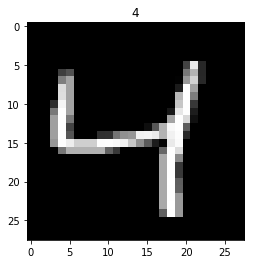

In [16]:
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.title(y_train[2]);

In [17]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

## 単純な一層モデル

In [20]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten

In [21]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)
print(model.summary())

input shape  (None, 28, 28)
output shape  (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


### 最適化
https://keras.io/ja/optimizers/

今回はadamを選択。

In [22]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_train[0]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [24]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
54000/54000 [==============================] - 2s - loss: 7.1571 - acc: 0.5516     
Epoch 2/10
54000/54000 [==============================] - 2s - loss: 5.8177 - acc: 0.6367     
Epoch 3/10
54000/54000 [==============================] - 2s - loss: 5.6860 - acc: 0.6453     
Epoch 4/10
54000/54000 [==============================] - 2s - loss: 5.6649 - acc: 0.6467     
Epoch 5/10
54000/54000 [==============================] - 2s - loss: 5.5747 - acc: 0.6526     
Epoch 6/10
54000/54000 [==============================] - 3s - loss: 5.5561 - acc: 0.6540     
Epoch 7/10
54000/54000 [==============================] - 2s - loss: 5.5526 - acc: 0.6543     
Epoch 8/10
54000/54000 [==============================] - 2s - loss: 5.5837 - acc: 0.6524     
Epoch 9/10
54000/54000 [==============================] - 2s - loss: 5.6038 - acc: 0.6511     
Epoch 10/10
54000/54000 [==============================] - 2s - loss: 5.4949 - acc: 0.6582     


In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

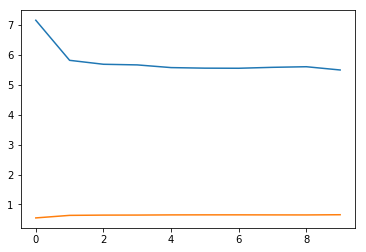

In [26]:
loss_values = history_dict['loss']
acc_values = history_dict['acc']

plt.plot(loss_values)
plt.plot(acc_values)

In [27]:
predictions = model.predict_classes(x_val, verbose=0)
(predictions == y_val).sum()/len(y_val)

0.65933333333333333

## 多層モデル

In [28]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)
print(model.summary())

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

input shape  (None, 28, 28)
output shape  (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
history = model.fit(x_train, y_train)

Epoch 1/10
54000/54000 [==============================] - 7s - loss: 14.4373 - acc: 0.1043     
Epoch 2/10
54000/54000 [==============================] - 6s - loss: 14.4370 - acc: 0.1043     
Epoch 3/10
54000/54000 [==============================] - 7s - loss: 14.4370 - acc: 0.1043     
Epoch 4/10
54000/54000 [==============================] - 7s - loss: 14.4370 - acc: 0.1043     
Epoch 5/10
54000/54000 [==============================] - 8s - loss: 14.4370 - acc: 0.1043     
Epoch 6/10
54000/54000 [==============================] - 8s - loss: 14.4370 - acc: 0.1043     
Epoch 7/10
54000/54000 [==============================] - 8s - loss: 14.4370 - acc: 0.1043     
Epoch 8/10
54000/54000 [==============================] - 8s - loss: 14.4370 - acc: 0.1043     
Epoch 9/10
54000/54000 [==============================] - 8s - loss: 14.4370 - acc: 0.1043     
Epoch 10/10
54000/54000 [==============================] - 8s - loss: 14.4370 - acc: 0.1043     


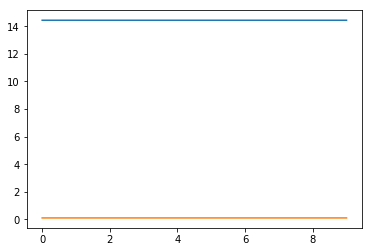

In [30]:
history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['acc']

plt.plot(loss_values)
plt.plot(acc_values)

In [31]:
predictions = model.predict_classes(x_val, verbose=0)
(predictions == y_val).sum()/len(y_val)

0.1055

## CNN

In [32]:
#https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adadelta
from keras.losses import categorical_crossentropy

batch_size = 128
num_classes = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [33]:
model.summary() #18496 = 64 * 289 = 64 * (1 + 9 * 32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [34]:
# 15分ぐらいかかる
history = model.fit(x_train.reshape(-1,28,28,1),
                    y_train, batch_size=batch_size, verbose=1, epochs=10)

Epoch 1/10
10368/54000 [====>.........................] - ETA: 126s - loss: 4.3666 - acc: 0.5523

KeyboardInterrupt: 

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['acc']

plt.plot(loss_values)
plt.plot(acc_values)

In [ ]:
predictions = model.predict_classes(x_val.reshape(-1,28,28,1), verbose=0)
(predictions == y_val).sum()/len(y_val)